# **AP157 Machine Learning Lab Assignment** 
## Module 2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information 

_Full Name (Last Name, First Name)_: Rangel, Jerico Miguel T.\
_Student No._: 2018-11666\
_Section_: WFU-WX

### Submission Information

_Date and Time Submitted (most recent upload)_: 5/31/2021 11:02 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: JERICO MIGUEL TAPANG RANGEL** 

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

For this assignment, you will work with galaxy data from the 
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.

In [4]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [5]:
data[:5]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814,  8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712,  3.416921,  3.330347, 'merger'),
       (2.10697, 0.9671 , 0.5681 , 0.33747, 0.6300893, 1.992887, 2.450746, 2.473116, 2.465324, 2.438683, 3.099957, 3.623704, 3.4633  , 9.110857,  8.354343, 11.26539 , 'merger'),
       (1.2284 , 0.60446, 0.39049, 0.28913, 0.6689994, 2.056115, 2.182252, 2.30951 , 2.391414, 2.472397, 3.627267, 4.063471, 3.717708, 9.580675, 12.20242 , 11.82622 , 'merger'),
       (1.80792, 0.78124, 0.45528, 0.35067, 0.5001697, 2.259167, 2.194723, 2.264567, 2.334713, 2.352568, 3.256751, 3.153533, 2.254511, 9.206746,  9.790146,  6.636931, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'),

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [6]:
import numpy as np

def get_features_targets(x):
  n = 16
  features = np.zeros((len(x),n-3))
  targets = []
  for m in range(len(x)):
    for i in range(n-3):
      if i == 10:
        features[m,i] = (x[m][i])/(x[m][i+3])
      elif i == 11:
        features[m,i] = (x[m][i])/(x[m][i+3])
      elif i == 12:
        features[m,i] = (x[m][i])/(x[m][i+3])
      else:
        features[m,i] = x[m][i]
    targets.append(x[m][n]) 
  return features,targets

The first 16 columns of the dataset correspond to the features, while the 17th column at index 16 corresponds to the target class. I use a nested for loop to go through each row and each column and copy them to the corresponding matrix. Additionally for indices 10 to 15, the data is collated into one based on the expression $R_{50}/R_{90}$. Columns 10,11, and 12 in the features matrix are replaced with the corresponding expressions for the $u$,$r$, and $z$ bands. I use append for the targets array since the classes are strings and can be listed as such. 

In [7]:
#Checking shapes of the arrays from the function
features,targets = get_features_targets(data) 
print(np.shape(features))
print(np.shape(targets))

(780, 13)
(780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeRegressor

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [8]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier

def predict_class(x,string):
  features,targets = get_features_targets(x)
  ftrain, ftest, ttrain,ttest = train_test_split(features,targets,train_size = 0.8, test_size = 0.2) 
  clf = DecisionTreeClassifier(random_state = 0)
  clf.fit(ftrain,ttrain)

  if string == "train": 
    predicted = clf.predict(features)
  elif string == "test":
    predicted = clf.predict(ftest)
    targets = ttest

  return predicted, targets

First we take the features and targets of the data using the function made earlier. We can then split the features into the training and test sets, each with their corresponding targets. I use the **DecisionTreeClassifier** class to fit the the training dataset. I add an additional parameter $string$ so the function works for both training and testing. Lastly we return the proper predicted and actual target arrays.

In [9]:
predicted_class, actual_class = predict_class(data,"train")
 
for i in np.arange(len(predicted_class)):
  if predicted_class[i] != actual_class[i]: 
    print((i, predicted_class[i], actual_class[i]))

(41, 'spiral', 'merger')
(53, 'spiral', 'merger')
(55, 'spiral', 'merger')
(73, 'spiral', 'merger')
(111, 'spiral', 'merger')
(120, 'spiral', 'merger')
(132, 'spiral', 'merger')
(159, 'spiral', 'merger')
(165, 'elliptical', 'merger')
(312, 'merger', 'elliptical')
(393, 'merger', 'elliptical')
(417, 'merger', 'elliptical')
(439, 'merger', 'elliptical')
(477, 'merger', 'elliptical')
(552, 'merger', 'spiral')
(561, 'merger', 'spiral')
(588, 'merger', 'spiral')
(623, 'merger', 'spiral')
(641, 'merger', 'spiral')
(655, 'merger', 'spiral')
(696, 'merger', 'spiral')
(698, 'merger', 'spiral')
(710, 'merger', 'spiral')
(712, 'merger', 'spiral')
(761, 'merger', 'spiral')
(768, 'merger', 'spiral')
(776, 'merger', 'spiral')


To check if it works, I listed the wrong predictions with the corresponding data.

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

In [10]:
pred, act = predict_class(data,"test")

conf = np.zeros ((3,3))
right = 0
for i in np.arange(len(pred)):
  if pred[i] == act[i]:
    right +=1
    if pred[i] == 'elliptical':
      conf[0,0] +=1
    elif pred[i] == 'spiral':
      conf[1,1] +=1
    elif pred[i] == 'merger':
      conf[2,2] +=1
  else:
    if pred[i] == 'elliptical':
      if act[i] == 'spiral':
        conf[1,0] +=1
      if act[i] == 'merger':
        conf[2,0] +=1
    elif pred[i] == 'spiral': 
      if act[i] == 'elliptical':
        conf[0,1] +=1
      if act[i] == 'merger':
        conf[2,1] +=1
    elif pred[i] == 'merger':
      if act[i] == 'elliptical':
        conf[0,2] +=1
      if act[i] == 'spiral':
        conf[1,2] +=1

test_accuracy = right/len(pred)

For the confusion matrix, I put in a for loop the conditions that add values to indices of the matrix. I also count the number of right predictions to be able to calculate the test accuracy.

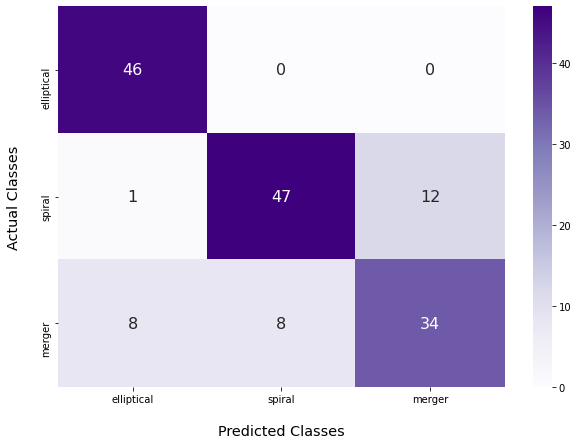

The test accuracy is: 81.41025641025641 %


In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, ('elliptical','spiral','merger'), ('elliptical','spiral','merger'))
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, cmap='Purples', annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("Predicted Classes", labelpad = 20, fontsize = 'x-large')
plt.ylabel("Actual Classes", labelpad = 20, fontsize = 'x-large')
plt.show()

print("The test accuracy is:",test_accuracy*100,"%")

Scikit has a confusion matrix function however I found it much more convenient to graph it using the seaborn and panda packages. The test accuracy was $81.4\%$, with there being up to 12 false predictions for one class. This is expected for the default decision tree classifier configuration, which does not have a set maximum number of leaf nodes.